In [1]:
from fastai.vision import *
from fastai.vision import *

In [2]:
folder = 'bangkok'
path = Path('data/cities')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images("bangkok.txt", dest, max_pics=300)


 Download of http://cpd.bangkok.go.th:90/web2/Promotion/Logo-090562.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p /Users/paigefink/.fastai/data
$ cd /Users/paigefink/.fastai/data
$ wget -c http://cpd.bangkok.go.th:90/web2/Promotion/Logo-090562.jpg
$ tar -zxvf Logo-090562.jpg

And re-run your code once the download is successful

Error http://www.mfa.go.th/business/contents/images/text_editor/images/news_img_580112_1.jpg HTTPConnectionPool(host='www.mfa.go.th', port=80): Max retries exceeded with url: /business/contents/images/text_editor/images/news_img_580112_1.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x1a2a3f96d8>, 'Connection to www.mfa.go.th timed out. (connect timeout=4)'))
Error https://%E0%B8%A0%E0%B8%B2%E0%B8%9E%E0%B8%A7%E0%B8%B4%E0%B8%A7.com/wp-content/uploads/2018/09/JBK-6-1212x606.jpg HTTPSConnectionPool(host='%e0%b8%a0%e0%b8%b2%e0%b8%9e%e0%b8%a7%e0%b8%b4%e0%b8%a7.com', port=443): Max retries exceeded with url: 

SystemExit: 1

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
folder = 'shanghai'
path = Path('data/cities')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images("shanghai.txt", dest, max_pics=300)

In [4]:
folder = 'tokyo'
path = Path('data/cities')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images("tokyo.txt", dest, max_pics=300)

In [5]:
classes = ["bangkok", "shanghai", "tokyo"]

In [6]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [7]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes

['bangkok', 'shanghai', 'tokyo']

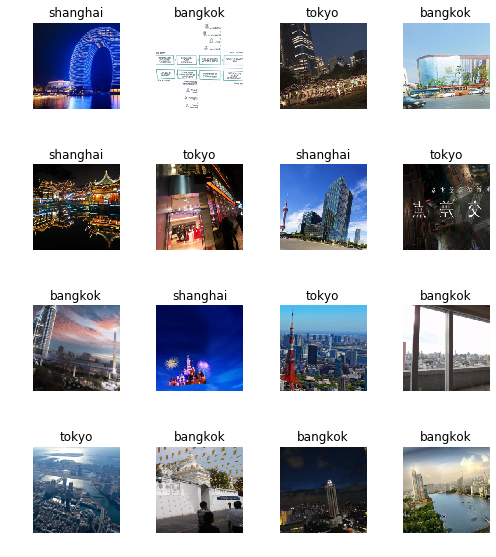

In [9]:
data.show_batch(rows=4, figsize=(7,8))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bangkok', 'shanghai', 'tokyo'], 3, 679, 169)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/paigefink/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 38.0MB/s]


In [16]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.440983,1.135144,0.623529,00:13
1,1.308861,1.264264,0.600000,00:12
2,1.210681,1.264319,0.635294,00:12
3,1.139365,1.252415,0.617647,00:12
4,1.079452,1.243059,0.611765,00:12


In [12]:
learn.save('stage-1')

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
Traceback (most recent call last):
  File "/anaconda3/lib/python3

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-3))

In [15]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (679 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
shanghai,shanghai,shanghai,shanghai,shanghai
Path: data/cities;

Valid: LabelList (169 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tokyo,tokyo,tokyo,tokyo,shanghai
Path: data/cities;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

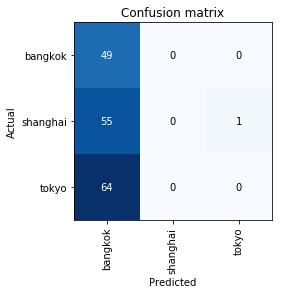

In [17]:
interp.plot_confusion_matrix()

In [20]:
interp.most_confused()

[('tokyo', 'bangkok', 64),
 ('shanghai', 'bangkok', 55),
 ('shanghai', 'tokyo', 1)]

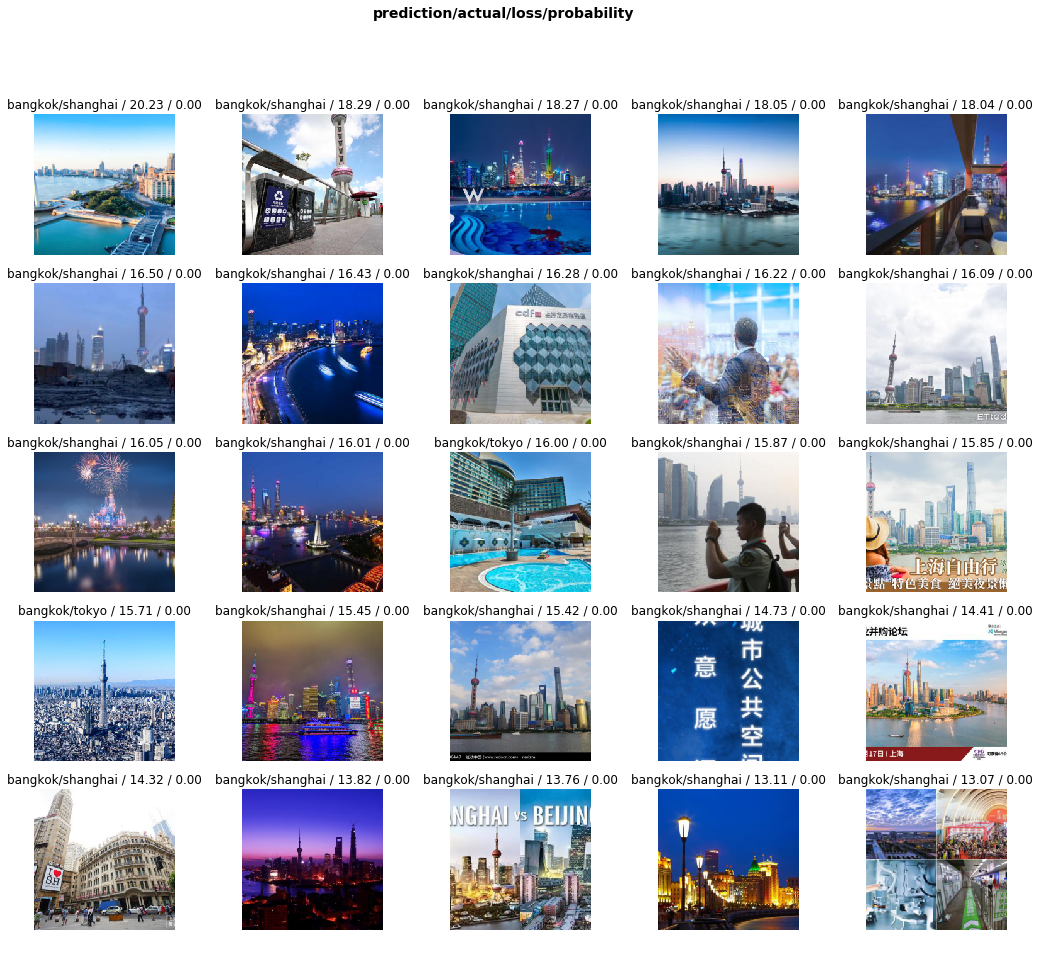

In [21]:
interp.plot_top_losses(25, figsize=(18,15))

In [22]:
from fastai.widgets import *

In [23]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [24]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-1');

In [26]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [27]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())